In [1]:
import numpy as np
from sklearn.preprocessing import Imputer

X = [[np.nan,2,3,1,5,2], [6,np.nan,1,8,2,1], [7,6,np.nan,np.nan,7,np.nan]]
print( 'X: ', X )

imp = Imputer( missing_values='NaN', strategy='mean', axis=1 )
imp.fit( X )

print( 'Impute columns w/mean:' )
print( imp.transform( X ) )

imp = Imputer( missing_values='NaN', strategy='most_frequent', axis=0 )
imp.fit( X )

print( 'Impute rows w/most frequent:' )
print( imp.transform( X ) )

X:  [[nan, 2, 3, 1, 5, 2], [6, nan, 1, 8, 2, 1], [7, 6, nan, nan, 7, nan]]
Impute columns w/mean:
[[2.6        2.         3.         1.         5.         2.        ]
 [6.         3.6        1.         8.         2.         1.        ]
 [7.         6.         6.66666667 6.66666667 7.         6.66666667]]
Impute rows w/most frequent:
[[6. 2. 3. 1. 5. 2.]
 [6. 2. 1. 8. 2. 1.]
 [7. 6. 1. 1. 7. 1.]]


In [3]:
X = [[0,1,2],[3,4,5],[6,7,8]]
print( 'X:', X )

trans = FunctionTransformer( np.log1p )
print( 'Transform using 1+log(p):' )
print( trans.transform( X ) )

X: [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
Transform using 1+log(p):
[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]
 [1.94591015 2.07944154 2.19722458]]


In [4]:
import pandas as pd
import os

os.chdir( 'C:/users/healey/Downloads' )
census_df = pd.read_csv( 'construction-census.csv', sep=',', skiprows=[ 1 ] )

# Count NaN, True=1, False=0, so sum True/False isnull() value list
nan_n = census_df.isnull().values.sum()
print( nan_n, 'values out of', census_df.size, 'values total, {:.2f}%'.format( nan_n / census_df.size * 100 ) )

25905 values out of 170100 values total, 15.23%


In [10]:
# First, make a copy of the original data frame
df_cp = census_df.copy()

# Check first 15 columns, remove if entirely NaN
row_n = df_cp.shape[ 0 ]
col_nm = list( df_cp )[ :15 ]

for nm in col_nm:
	nan_n = df_cp[ nm ].isnull().values.sum()
	if nan_n == row_n:
		print( nm, 'has only NaN values, removing...' )
		del df_cp[ nm ]
	elif nan_n > 0:
		print( '{:s}, {:d} NaN values ({:.2f}%)'.format( nm, nan_n, ( nan_n / row_n * 100 ) ) )
	else:
		print( nm, 'has no NaN values' )



GEO.id has no NaN values
GEO.id2 has no NaN values
GEO.display-label has no NaN values
GEO.annotation.id has only NaN values, removing...
NAICS.id has no NaN values
NAICS.display-label has no NaN values
NAICS.annotation.id has only NaN values, removing...
YEAR.id has no NaN values
ESTAB has no NaN values
ESTAB_S has no NaN values
EMP, 38 NaN values (2.41%)
EMP_S, 38 NaN values (2.41%)
PAYANN, 57 NaN values (3.62%)
PAYANN_S, 57 NaN values (3.62%)
BENEFIT, 61 NaN values (3.87%)


In [11]:
# We can fill NaNs in a column with a constant value
df_cp = census_df.copy()

print( 'Original EMP column:' )
print( df_cp.iloc[ 217:223 ][ 'EMP' ] )
df_cp[ 'EMP' ] = df_cp[ 'EMP' ].fillna( 0 )

print( 'Constant value imputation:' )
print( 'Column EMP now has', df_cp[ 'EMP' ].isnull().values.sum(), 'NaNs' )
print( df_cp.iloc[ 217:223 ][ 'EMP' ] )

# We can backfill (move next value back) or pad (more last value forward)
df_cp = census_df.copy()
print( 'Backfill value imputation:' )
df_cp[ 'EMP' ] = df_cp[ 'EMP' ].fillna( method='backfill' )
print( df_cp.iloc[ 217:223 ][ 'EMP' ] )

df_cp = census_df.copy()
print( 'Pad value imputation:' )
df_cp[ 'EMP' ] = df_cp[ 'EMP' ].fillna( method='pad' )
print( df_cp.iloc[ 217:223 ][ 'EMP' ] )

Original EMP column:
217     659.0
218       NaN
219     431.0
220     944.0
221       NaN
222    1143.0
Name: EMP, dtype: float64
Constant value imputation:
Column EMP now has 0 NaNs
217     659.0
218       0.0
219     431.0
220     944.0
221       0.0
222    1143.0
Name: EMP, dtype: float64
Backfill value imputation:
217     659.0
218     431.0
219     431.0
220     944.0
221    1143.0
222    1143.0
Name: EMP, dtype: float64
Pad value imputation:
217     659.0
218     659.0
219     431.0
220     944.0
221     944.0
222    1143.0
Name: EMP, dtype: float64


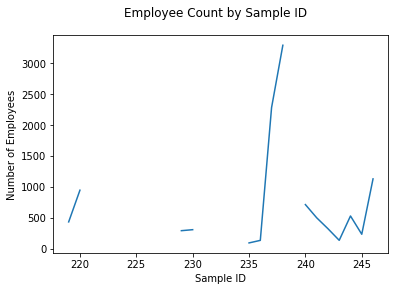

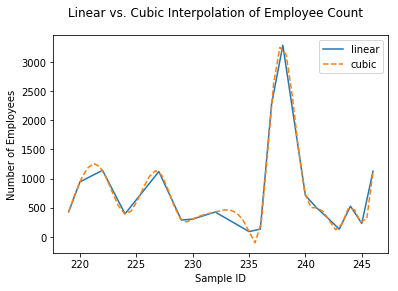

In [22]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# More recent versions of pandas support new methods of interpolation through scipy

# Original subset of EMP values with numerous NaNs
df_cp = census_df.copy()
nan_df = df_cp[ 'EMP' ].isnull()

fig = plt.figure()
fig.suptitle( 'Employee Count by Sample ID' )
plt.xlabel( 'Sample ID' )
plt.ylabel( 'Number of Employees' )
df_cp.iloc[ 219:247 ][ 'EMP' ].plot()
plt.show()

# Replace NaN with linear interpolation
df_cp = census_df.copy()
df_cp[ 'EMP' ] = df_cp[ 'EMP' ].interpolate( method='linear' )

fig = plt.figure()
fig.suptitle( 'Linear vs. Cubic Interpolation of Employee Count' )
plt.xlabel( 'Sample ID' )
plt.ylabel( 'Number of Employees' )
df_cp.iloc[ 219:247 ][ 'EMP' ].plot()

# Replace NaN with cubic interpolation
df_cp = census_df.copy()
df_cp[ 'EMP' ] = df_cp[ 'EMP' ].interpolate( method='cubic' )
x = df_cp.iloc[ 219:247 ][ 'EMP' ].index
y = df_cp.iloc[ 219:247 ][ 'EMP' ]
f = interp1d( x, y, kind='cubic' )

x = np.linspace( 219, 246, num=50, endpoint=True )
plt.plot( x, f( x ), '--' )
plt.legend( [ 'linear', 'cubic' ] )
plt.show()